In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

### PCA To 2D Data

In [18]:
x1 = np.array([1,2,3,4,5,6])
x2 = np.array([7.5, 11, 16, 18, 20, 26])

<function matplotlib.pyplot.show(*args, **kw)>

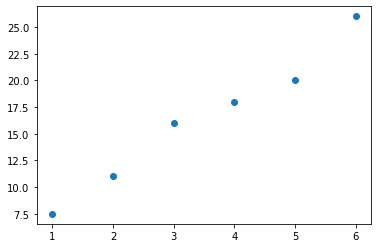

In [19]:
plt.scatter(x1, x2)
plt.show

In [20]:
X = np.c_[x1, x2]
X

array([[ 1. ,  7.5],
       [ 2. , 11. ],
       [ 3. , 16. ],
       [ 4. , 18. ],
       [ 5. , 20. ],
       [ 6. , 26. ]])

In [21]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=1)
pca_tranform_data = pca.fit_transform(X)

In [29]:
pca_tranform_data

array([[-9.26049952],
       [-5.62047228],
       [-0.53656217],
       [ 1.65958219],
       [ 3.85572654],
       [ 9.90222524]])

In [30]:
pca.components_

array([[0.27096719, 0.96258858]])

In [31]:
x_approx = pca.inverse_transform(pca_tranform_data)
x_approx

array([[ 0.99070848,  7.50261555],
       [ 1.97703643, 11.00646421],
       [ 3.35460926, 15.90017805],
       [ 3.94969232, 18.01416153],
       [ 4.54477538, 20.12814502],
       [ 6.18317813, 25.94843564]])

<function matplotlib.pyplot.show(*args, **kw)>

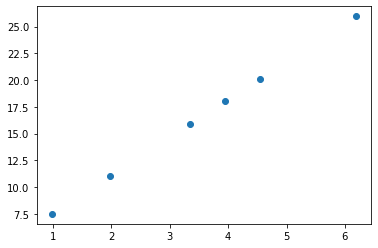

In [32]:
plt.scatter(x_approx[:,0], x_approx[:,1])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

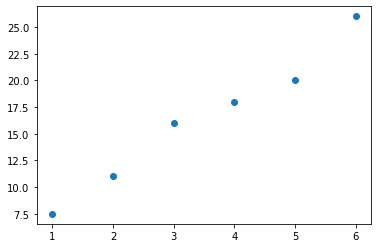

In [33]:
plt.scatter(x1, x2)
plt.show

### PCA on 3D Data

In [37]:
np.random.seed(2343243)

In [46]:
mean_val1 = np.array([0,0,0])
con_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class1 = np.random.multivariate_normal(mean_val1, con_mat1, 100)
class1[0:5]

array([[ 0.00689033, -2.49704627,  0.03020184],
       [-0.09998695, -1.3481138 , -0.86917986],
       [-0.43684145,  0.13273124,  1.49735211],
       [ 0.75026456, -0.2407391 ,  0.87773183],
       [ 0.49511559, -2.43373966,  0.04451676]])

In [48]:
mean_val2 = np.array([1,1,1])
con_mat2 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class2 = np.random.multivariate_normal(mean_val2, con_mat2, 100)
class2[0:5]

array([[-1.60310213,  2.05112781,  1.8979783 ],
       [ 3.93835774,  0.97807241,  1.38371322],
       [ 0.20818818,  1.81417681,  1.4732838 ],
       [ 2.10732689,  0.71058433,  0.18814953],
       [ 0.42679247,  0.65996955,  0.6570875 ]])

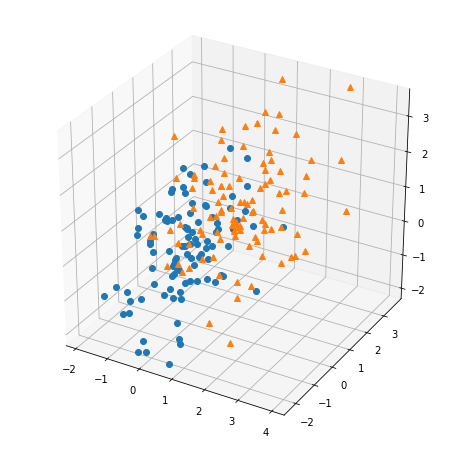

In [50]:
from mpl_toolkits.mplot3d import Axes3D, proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = "3d")
ax.plot(class1[:,0],class1[:,2],class1[:,2], "o")
ax.plot(class2[:,0],class2[:,2],class2[:,2], "^")
plt.show()

In [56]:
all_data = np.concatenate((class1, class2))
all_data.shape

(200, 3)

In [66]:
pca1 = PCA(n_components=2)
pca_tranform =pca1.fit_transform(all_data)

In [65]:
pca1.components_

array([[ 0.64887976,  0.59504592,  0.47421029],
       [-0.21877806,  0.74281868, -0.63273737]])

<function matplotlib.pyplot.show(*args, **kw)>

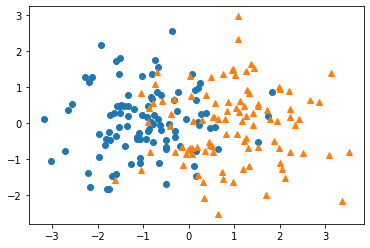

In [69]:
plt.plot(pca_tranform[0:100,0], pca_tranform[0:100,1], "o")
plt.plot(pca_tranform[100:200,0], pca_tranform[100:200,1], "^")
plt.show

# Analysis on Breast Cancer Datasets

In [73]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [74]:
bc = load_breast_cancer()

In [75]:
X = bc.data
Y = bc.target

In [76]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [82]:
from sklearn.linear_model import LogisticRegression

In [92]:
clf = LogisticRegression(max_iter=10000)
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
clf.score(x_test, y_test)

0.9790209790209791

In [124]:
# Applying PCA 
pca_bc = PCA(n_components=15)
x_train_pca = pca_bc.fit_transform(x_train)
x_test_pca = pca_bc.transform(x_test)

In [125]:
clf_1 = LogisticRegression(max_iter=10000)
clf_1.fit(x_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
clf_1.score(x_test_pca, y_test)

0.9790209790209791

(426,)